In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report





In [2]:
df = pd.read_csv('Pakistani_Diabetes_Dataset.csv')

# Step 2: Check the first few rows of the dataset
print("Dataset Preview:")
print(df.head())



Dataset Preview:
    Age  Gender  Rgn     wt    BMI   wst  sys  dia  his   A1c  B.S.R  vision  \
0  60.0       1     0  76.0  29.90  41.0  130   90    0  8.90    278       0   
1  57.0       1     1  64.0  24.30  39.0  120   80    1  8.50    165       0   
2  58.0       0     0  73.0  25.20  34.0  140   90    0  5.65    130       1   
3  27.0       0     1  60.0  22.01  30.0  110   70    0  5.00     95       0   
4  56.0       1     0  70.0  25.80  43.0  125   90    0  8.30    139       1   

   Exr  dipsia  uria   Dur  neph  HDL  Outcome  
0   30       1     0   5.0     0   60        1  
1   20       1     1  20.0     0   42        1  
2   20       0     0   0.0     0   54        0  
3   15       0     0   0.0     0   57        0  
4   40       1     0   5.0     1   53        1  


In [3]:
# Step 3: Prepare the data
# Split the dataset into features (X) and target (y)

X = df.drop('Outcome', axis=1)  # Features: all columns except 'Outcome'
y = df['Outcome']  # Target: 'Outcome' column

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:

# Step 5: Create and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions using the trained model
y_pred = model.predict(X_test)
y_pred


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [5]:
# Step 7: Evaluate the model's performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9890510948905109
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.99      0.99      0.99       136

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



In [8]:
# Step 3: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc




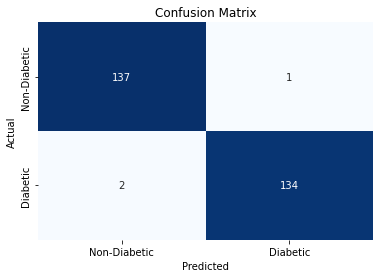

In [9]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


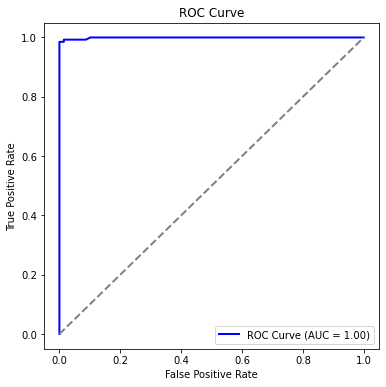

In [10]:
# Step 4: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


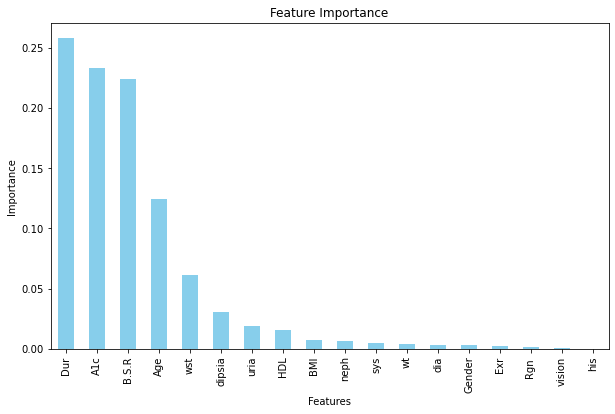

In [11]:
# Step 5: Feature Importance
importances = model.feature_importances_
indices = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
indices.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()